In [117]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [118]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import seaborn as sns
from matplotlib import pyplot as plt

In [119]:
energy = pd.read_csv('/content/energy_dataset.csv')
weather = pd.read_csv('/content/weather_features.csv')

In [120]:
energy.head()

time  generation biomass  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   
2  2015-01-01 02:00:00+01:00               448.0   
3  2015-01-01 03:00:00+01:00               438.0   
4  2015-01-01 04:00:00+01:00               428.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                 329.0                                 0.0   
1                                 328.0                                 0.0   
2                                 323.0                                 0.0   
3                                 254.0                                 0.0   
4                                 187.0                                 0.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                 4844.0                       4821.0                  162.0   
1                 5196.0                       4755.0                  158.0   
2                 4857.0                       4581.0                  157.0   
3                 4314.0                       4131.0                  160.0   
4                 4130.0                       3840.0                  156.0   

   generation fossil oil shale  generation fossil peat  generation geothermal  \
0                          0.0                     0.0                    0.0   
1                          0.0                     0.0                    0.0   
2                          0.0                     0.0                    0.0   
3                          0.0                     0.0                    0.0   
4                          0.0                     0.0                    0.0   

   ...  generation waste  generation wind offshore  generation wind onshore  \
0  ...             196.0                       0.0                   6378.0   
1  ...             195.0                       0.0                   5890.0   
2  ...             196.0                       0.0                   5461.0   
3  ...             191.0                       0.0                   5238.0   
4  ...             189.0                       0.0                   4935.0   

   forecast solar day ahead  forecast wind offshore eday ahead  \
0                      17.0                                NaN   
1                      16.0                                NaN   
2                       8.0                                NaN   
3                       2.0                                NaN   
4                       9.0                                NaN   

   forecast wind onshore day ahead  total load forecast  total load actual  \
0                           6436.0              26118.0            25385.0   
1                           5856.0              24934.0            24382.0   
2                           5454.0              23515.0            22734.0   
3                           5151.0              22642.0            21286.0   
4                           4861.0              21785.0            20264.0   

   price day ahead  price actual  
0            50.10         65.41  
1            48.10         64.92  
2            47.33         64.48  
3            42.27         59.32  
4            38.41         56.04  

[5 rows x 29 columns]

In [121]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [122]:
sum1 = energy['generation fossil coal-derived gas'].sum()
sum2 = energy['generation fossil oil shale'].sum()
sum3 = energy['generation fossil peat'].sum()
sum4 = energy['generation geothermal'].sum()
sum5 = energy['generation marine'].sum()
sum6 = energy['generation hydro pumped storage aggregated'].sum()
sum7 = energy['generation wind offshore'].sum()
sum8 = energy['forecast wind offshore eday ahead'].sum()
print(sum1)
print(sum2)
print(sum3)
print(sum4)
print(sum5)
print(sum6)
print(sum7)
print(sum8)


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [123]:
energy = energy.drop(['generation fossil coal-derived gas','generation fossil oil shale','generation fossil peat','generation geothermal','generation hydro pumped storage aggregated','generation wind offshore','forecast wind offshore eday ahead'],axis =1)

In [124]:
energy = energy.drop(['generation marine'],axis = 1)

In [125]:
energy.head()

time  generation biomass  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   
2  2015-01-01 02:00:00+01:00               448.0   
3  2015-01-01 03:00:00+01:00               438.0   
4  2015-01-01 04:00:00+01:00               428.0   

   generation fossil brown coal/lignite  generation fossil gas  \
0                                 329.0                 4844.0   
1                                 328.0                 5196.0   
2                                 323.0                 4857.0   
3                                 254.0                 4314.0   
4                                 187.0                 4130.0   

   generation fossil hard coal  generation fossil oil  \
0                       4821.0                  162.0   
1                       4755.0                  158.0   
2                       4581.0                  157.0   
3                       4131.0                  160.0   
4                       3840.0                  156.0   

   generation hydro pumped storage consumption  \
0                                        863.0   
1                                        920.0   
2                                       1164.0   
3                                       1503.0   
4                                       1826.0   

   generation hydro run-of-river and poundage  \
0                                      1051.0   
1                                      1009.0   
2                                       973.0   
3                                       949.0   
4                                       953.0   

   generation hydro water reservoir  generation nuclear  ...  \
0                            1899.0              7096.0  ...   
1                            1658.0              7096.0  ...   
2                            1371.0              7099.0  ...   
3                             779.0              7098.0  ...   
4                             720.0              7097.0  ...   

   generation other renewable  generation solar  generation waste  \
0                        73.0              49.0             196.0   
1                        71.0              50.0             195.0   
2                        73.0              50.0             196.0   
3                        75.0              50.0             191.0   
4                        74.0              42.0             189.0   

   generation wind onshore  forecast solar day ahead  \
0                   6378.0                      17.0   
1                   5890.0                      16.0   
2                   5461.0                       8.0   
3                   5238.0                       2.0   
4                   4935.0                       9.0   

   forecast wind onshore day ahead  total load forecast  total load actual  \
0                           6436.0              26118.0            25385.0   
1                           5856.0              24934.0            24382.0   
2                           5454.0              23515.0            22734.0   
3                           5151.0              22642.0            21286.0   
4                           4861.0              21785.0            20264.0   

   price day ahead  price actual  
0            50.10         65.41  
1            48.10         64.92  
2            47.33         64.48  
3            42.27         59.32  
4            38.41         56.04  

[5 rows x 21 columns]

In [126]:
energy.describe()

generation biomass  generation fossil brown coal/lignite  \
count        35045.000000                          35046.000000   
mean           383.513540                            448.059208   
std             85.353943                            354.568590   
min              0.000000                              0.000000   
25%            333.000000                              0.000000   
50%            367.000000                            509.000000   
75%            433.000000                            757.000000   
max            592.000000                            999.000000   

       generation fossil gas  generation fossil hard coal  \
count           35046.000000                 35046.000000   
mean             5622.737488                  4256.065742   
std              2201.830478                  1961.601013   
min                 0.000000                     0.000000   
25%              4126.000000                  2527.000000   
50%              4969.000000                  4474.000000   
75%              6429.000000                  5838.750000   
max             20034.000000                  8359.000000   

       generation fossil oil  generation hydro pumped storage consumption  \
count           35045.000000                                 35045.000000   
mean              298.319789                                   475.577343   
std                52.520673                                   792.406614   
min                 0.000000                                     0.000000   
25%               263.000000                                     0.000000   
50%               300.000000                                    68.000000   
75%               330.000000                                   616.000000   
max               449.000000                                  4523.000000   

       generation hydro run-of-river and poundage  \
count                                35045.000000   
mean                                   972.116108   
std                                    400.777536   
min                                      0.000000   
25%                                    637.000000   
50%                                    906.000000   
75%                                   1250.000000   
max                                   2000.000000   

       generation hydro water reservoir  generation nuclear  generation other  \
count                      35046.000000        35047.000000      35046.000000   
mean                        2605.114735         6263.907039         60.228585   
std                         1835.199745          839.667958         20.238381   
min                            0.000000            0.000000          0.000000   
25%                         1077.250000         5760.000000         53.000000   
50%                         2164.000000         6566.000000         57.000000   
75%                         3757.000000         7025.000000         80.000000   
max                         9728.000000         7117.000000        106.000000   

       generation other renewable  generation solar  generation waste  \
count                35046.000000      35046.000000      35045.000000   
mean                    85.639702       1432.665925        269.452133   
std                     14.077554       1680.119887         50.195536   
min                      0.000000          0.000000          0.000000   
25%                     73.000000         71.000000        240.000000   
50%                     88.000000        616.000000        279.000000   
75%                     97.000000       2578.000000        310.000000   
max                    119.000000       5792.000000        357.000000   

       generation wind onshore  forecast solar day ahead  \
count             35046.000000              35064.000000   
mean               5464.479769               1439.066735   
std                3213.691587               1677.703355   
min                   0.000000                  0.000

there are zeroes in the dataset even after taking out the columns with all zeroes.

In [127]:
energy.isnull().sum()

time                                            0
generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind onshore                        18
forecast solar day ahead                        0
forecast wind onshore day ahead                 0
total load forecast                             0
total load actual                              36
price day ahead                                 0
price actual                                    0
dtype: int64

we cant neglect these many zeroes or nulls. SO, we need to cleanse the zero values. ALso, we want to use time data as the main index for predicting later. but above, we see that time stamp is in the form of an object. We also need to change into the required format.

In [128]:
energy.loc[energy['generation waste'] == 0]

time  generation biomass  \
25125  2017-11-12 21:00:00+01:00                 0.0   
25164  2017-11-14 12:00:00+01:00                 0.0   
25171  2017-11-14 19:00:00+01:00                 0.0   

       generation fossil brown coal/lignite  generation fossil gas  \
25125                                   0.0                 6899.0   
25164                                   0.0                10064.0   
25171                                   0.0                12336.0   

       generation fossil hard coal  generation fossil oil  \
25125                          0.0                    0.0   
25164                          0.0                    0.0   
25171                          0.0                    0.0   

       generation hydro pumped storage consumption  \
25125                                          0.0   
25164                                          0.0   
25171                                          0.0   

       generation hydro run-of-river and poundage  \
25125                                         0.0   
25164                                         0.0   
25171                                         0.0   

       generation hydro water reservoir  generation nuclear  ...  \
25125                               0.0                 0.0  ...   
25164                               0.0                 0.0  ...   
25171                               0.0                 0.0  ...   

       generation other renewable  generation solar  generation waste  \
25125                         0.0               0.0               0.0   
25164                         0.0               0.0               0.0   
25171                         0.0               0.0               0.0   

       generation wind onshore  forecast solar day ahead  \
25125                      0.0                      36.0   
25164                      0.0                    4325.0   
25171                      0.0                     128.0   

       forecast wind onshore day ahead  total load forecast  \
25125                           8536.0              36671.0   
25164                           7561.0              33805.0   
25171                           5679.0              35592.0   

       total load actual  price day ahead  price actual  
25125            36562.0            69.48         67.66  
25164                NaN            60.53         66.17  
25171                NaN            68.05         75.45  

[3 rows x 21 columns]

In [129]:
energy.interpolate(method='cubic', limit_direction='forward', inplace=True, axis=0)

<ipython-input-129-3278cc5329e7>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  energy.interpolate(method='cubic', limit_direction='forward', inplace=True, axis=0)


In [130]:
energy.isnull().sum()

time                                           0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
forecast solar day ahead                       0
forecast wind onshore day ahead                0
total load forecast                            0
total load actual                              0
price day ahead                                0
price actual                                   0
dtype: int64

We can see the data is now without even a single 0 and all the values are filled up. Now we change the type of the time stamp. It is in the form of object. We need to change that to int type.

In [131]:
energy['time'] = pd.to_datetime(energy['time'], utc=True, infer_datetime_format=True)
energy = energy.set_index('time')

<ipython-input-131-7071346194b9>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  energy['time'] = pd.to_datetime(energy['time'], utc=True, infer_datetime_format=True)


Now, we have processed the electricty usage dataset. Now, we will try to combine both the weather and charges datasets into one and use them combinedly for analysis.

In [132]:
weather.head()

dt_iso city_name     temp  temp_min  temp_max  pressure  \
0  2015-01-01 00:00:00+01:00  Valencia  270.475   270.475   270.475      1001   
1  2015-01-01 01:00:00+01:00  Valencia  270.475   270.475   270.475      1001   
2  2015-01-01 02:00:00+01:00  Valencia  269.686   269.686   269.686      1002   
3  2015-01-01 03:00:00+01:00  Valencia  269.686   269.686   269.686      1002   
4  2015-01-01 04:00:00+01:00  Valencia  269.686   269.686   269.686      1002   

   humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  \
0        77           1        62      0.0      0.0      0.0           0   
1        77           1        62      0.0      0.0      0.0           0   
2        78           0        23      0.0      0.0      0.0           0   
3        78           0        23      0.0      0.0      0.0           0   
4        78           0        23      0.0      0.0      0.0           0   

   weather_id weather_main weather_description weather_icon  
0         800        clear        sky is clear          01n  
1         800        clear        sky is clear          01n  
2         800        clear        sky is clear          01n  
3         800        clear        sky is clear          01n  
4         800        clear        sky is clear          01n

In [133]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

there are multiple types of datatypes. We will convert everything into floats for easy traversing and unifying both datasets.

as there are multiple things to change, we will define a function which can be used for the whole dataset and convert the columns with intergers to floats.

In [134]:
def df_convert_dtypes(df, convert_from, convert_to):
    cols = df.select_dtypes(include=[convert_from]).columns
    for col in cols:
        df[col] = df[col].values.astype(convert_to)
    return df

In [135]:
weather = df_convert_dtypes(weather, np.int64, np.float64)

Now, we do the same thing we did for time type conversion. the time is in onbject type. We will change it into float using the inbuilt date to time function

In [136]:
weather['time'] = pd.to_datetime(weather['dt_iso'], utc=True, infer_datetime_format=True)
weather = weather.drop(['dt_iso'], axis=1)
weather = weather.set_index('time')

<ipython-input-136-7749f0461efc>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  weather['time'] = pd.to_datetime(weather['dt_iso'], utc=True, infer_datetime_format=True)


In [137]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 178396 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   city_name            178396 non-null  object 
 1   temp                 178396 non-null  float64
 2   temp_min             178396 non-null  float64
 3   temp_max             178396 non-null  float64
 4   pressure             178396 non-null  float64
 5   humidity             178396 non-null  float64
 6   wind_speed           178396 non-null  float64
 7   wind_deg             178396 non-null  float64
 8   rain_1h              178396 non-null  float64
 9   rain_3h              178396 non-null  float64
 10  snow_3h              178396 non-null  float64
 11  clouds_all           178396 non-null  float64
 12  weather_id           178396 non-null  float64
 13  weather_main         178396 non-null  object 
 14  weather_description  1

the weathe rmain, weather description and weather icon are textual data and they will be stored in object mode only. Now we will analyse the averages, medians, mins and maxs.

In [138]:
weather.describe()

temp       temp_min       temp_max      pressure  \
count  178396.000000  178396.000000  178396.000000  1.783960e+05   
mean      289.618605     288.330442     291.091267  1.069261e+03   
std         8.026199       7.955491       8.612454  5.969632e+03   
min       262.240000     262.240000     262.240000  0.000000e+00   
25%       283.670000     282.483602     284.650000  1.013000e+03   
50%       289.150000     288.150000     290.150000  1.018000e+03   
75%       295.150000     293.730125     297.150000  1.022000e+03   
max       315.600000     315.150000     321.150000  1.008371e+06   

            humidity    wind_speed       wind_deg        rain_1h  \
count  178396.000000  178396.00000  178396.000000  178396.000000   
mean       68.423457       2.47056     166.591190       0.075492   
std        21.902888       2.09591     116.611927       0.398847   
min         0.000000       0.00000       0.000000       0.000000   
25%        53.000000       1.00000      55.000000       0.000000   
50%        72.000000       2.00000     177.000000       0.000000   
75%        87.000000       4.00000     270.000000       0.000000   
max       100.000000     133.00000     360.000000      12.000000   

             rain_3h        snow_3h     clouds_all     weather_id  
count  178396.000000  178396.000000  178396.000000  178396.000000  
mean        0.000380       0.004763      25.073292     759.831902  
std         0.007288       0.222604      30.774129     108.733223  
min         0.000000       0.000000       0.000000     200.000000  
25%         0.000000       0.000000       0.000000     800.000000  
50%         0.000000       0.000000      20.000000     800.000000  
75%         0.000000       0.000000      40.000000     801.000000  
max         2.315000      21.500000     100.000000     804.000000

As we can see, the pressure is reaching some abnormal highs. The wind speed too is at a max of 133 which is very high than the average of that region. This means there are some outliers in the data. We must try to nullify these outliers.

since both the datasets contain data for similar cities, we should be getting readings accordingly. but there are are high numbe rof weather readings than the electricity charge. This means there are certain values which might be repeated.

In [139]:
dup = weather.duplicated(keep='first').sum()
print('there are these many duplicate values in the weather data:')
print(dup)

there are these many duplicate values in the weather data:
8622


The dataset says it is the dataset for 5 different cities. The following are those.

In [140]:
cities = weather['city_name'].unique()
print(cities)

['Valencia' 'Madrid' 'Bilbao' ' Barcelona' 'Seville']


Now, kets see the number of recordings each cities has

In [141]:
grouped_weather = weather.groupby('city_name')
for city in cities:
    print('There are {} recordings'.format(grouped_weather.get_group('{}'.format(city)).shape[0]),'about {}.'.format(city))

There are 35145 recordings about Valencia.
There are 36267 recordings about Madrid.
There are 35951 recordings about Bilbao.
There are 35476 recordings about  Barcelona.
There are 35557 recordings about Seville.


but from above, energy has only 35064 readings in total. SO, now we delete any repeating/recurring rows in each city.

In [142]:
weather_2 = weather.reset_index().drop_duplicates(subset=['time', 'city_name'],
                                                        keep='last').set_index('time')

weather = weather.reset_index().drop_duplicates(subset=['time', 'city_name'],
                                                      keep='first').set_index('time')

In [143]:
grouped_weather = weather.groupby('city_name')
for city in cities:
    print('There are {} recordings'.format(grouped_weather.get_group('{}'.format(city)).shape[0]),'about {}.'.format(city))

There are 35064 recordings about Valencia.
There are 35064 recordings about Madrid.
There are 35064 recordings about Bilbao.
There are 35064 recordings about  Barcelona.
There are 35064 recordings about Seville.


As you can see above, we have equal number of datasets exactly in each city and energy. Now we can merge both dstasets into one.

In [144]:
weather.head()


city_name     temp  temp_min  temp_max  pressure  \
time                                                                         
2014-12-31 23:00:00+00:00  Valencia  270.475   270.475   270.475    1001.0   
2015-01-01 00:00:00+00:00  Valencia  270.475   270.475   270.475    1001.0   
2015-01-01 01:00:00+00:00  Valencia  269.686   269.686   269.686    1002.0   
2015-01-01 02:00:00+00:00  Valencia  269.686   269.686   269.686    1002.0   
2015-01-01 03:00:00+00:00  Valencia  269.686   269.686   269.686    1002.0   

                           humidity  wind_speed  wind_deg  rain_1h  rain_3h  \
time                                                                          
2014-12-31 23:00:00+00:00      77.0         1.0      62.0      0.0      0.0   
2015-01-01 00:00:00+00:00      77.0         1.0      62.0      0.0      0.0   
2015-01-01 01:00:00+00:00      78.0         0.0      23.0      0.0      0.0   
2015-01-01 02:00:00+00:00      78.0         0.0      23.0      0.0      0.0   
2015-01-01 03:00:00+00:00      78.0         0.0      23.0      0.0      0.0   

                           snow_3h  clouds_all  weather_id weather_main  \
time                                                                      
2014-12-31 23:00:00+00:00      0.0         0.0       800.0        clear   
2015-01-01 00:00:00+00:00      0.0         0.0       800.0        clear   
2015-01-01 01:00:00+00:00      0.0         0.0       800.0        clear   
2015-01-01 02:00:00+00:00      0.0         0.0       800.0        clear   
2015-01-01 03:00:00+00:00      0.0         0.0       800.0        clear   

                          weather_description weather_icon  
time                                                        
2014-12-31 23:00:00+00:00        sky is clear          01n  
2015-01-01 00:00:00+00:00        sky is clear          01n  
2015-01-01 01:00:00+00:00        sky is clear          01n  
2015-01-01 02:00:00+00:00        sky is clear          01n  
2015-01-01 03:00:00+00:00        sky is clear          01n

Looking from the above table, we can see the weathe rmain, weather description, weather id almost talk about the same ting. We will see what exactly are in these columns.ALso, the weather icon might be some visual code for it and we are not interessted in exploring it so we will take away that column

In [145]:
weather_id2 = weather['weather_id'].unique()
weather_main2 = weather['weather_main'].unique()
weather_description2 = weather['weather_description'].unique()

print(len(weather_id2))
print(len(weather_main2))
print(len(weather_description2))

37
12
41


From above, we can see that there are similar number of id's and descriptions for the weather data.

**R squared test for consistency of the object datatypes.**

In [146]:
def encode_and_display_r2_score(df_1, df_2, column, categorical=False):
    dfs = [df_1, df_2]
    if categorical:
        for df in dfs:
            le = LabelEncoder()
            df[column] = le.fit_transform(df[column])
    r2 = r2_score(df_1[column], df_2[column])
    print("R-Squared score of {} is {}".format(column, round(r2, 3)))


In [147]:
from sklearn.preprocessing import LabelEncoder

encode_and_display_r2_score(weather, weather_2, 'weather_description', categorical=True)
encode_and_display_r2_score(weather, weather_2, 'weather_main', categorical=True)
encode_and_display_r2_score(weather, weather_2, 'weather_id')

R-Squared score of weather_description is 0.973
R-Squared score of weather_main is 0.963
R-Squared score of weather_id is 0.921


We can see that the r2 scores are not 1. This means there is still data which is interfering and giving some errors. Since only ythe data from the above three columns are scalars, that might be the case with giving out errors. we will drop all the three and check again.

In [148]:
weather = weather.drop(['weather_main', 'weather_id','weather_description', 'weather_icon'], axis=1)

In [149]:
from sklearn.preprocessing import LabelEncoder

weather_cols = weather.columns.drop('city_name')

for col in weather_cols:
    encode_and_display_r2_score(weather, weather_2, col)

R-Squared score of temp is 1.0
R-Squared score of temp_min is 1.0
R-Squared score of temp_max is 1.0
R-Squared score of pressure is 1.0
R-Squared score of humidity is 1.0
R-Squared score of wind_speed is 1.0
R-Squared score of wind_deg is 1.0
R-Squared score of rain_1h is 1.0
R-Squared score of rain_3h is 1.0
R-Squared score of snow_3h is 1.0
R-Squared score of clouds_all is 1.0


All the remaining r squared tests have 1. So, the error has been nullified

Now, we move on towards the outliers. We saw the pressure and wind speed is abnormally high somewhere. So, we will have to remove those values and populate those with normal values.

In [150]:
weather.loc[weather.pressure > 1051, 'pressure'] = np.nan
weather.loc[weather.pressure < 931, 'pressure'] = np.nan
weather.loc[weather.wind_speed > 50, 'wind_speed'] = np.nan

In [151]:
weather.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

<ipython-input-151-d2ad45d8d622>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  weather.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)


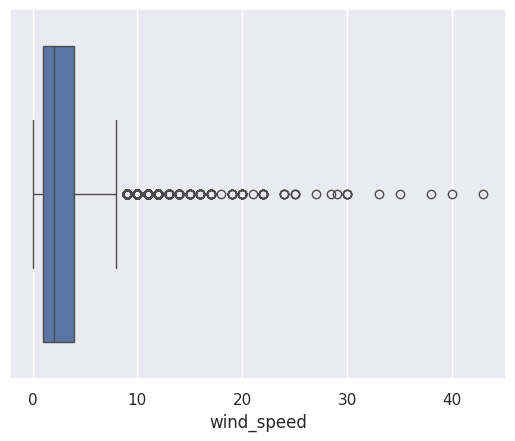

In [152]:
sns.boxplot(x=weather['wind_speed'])
plt.show()

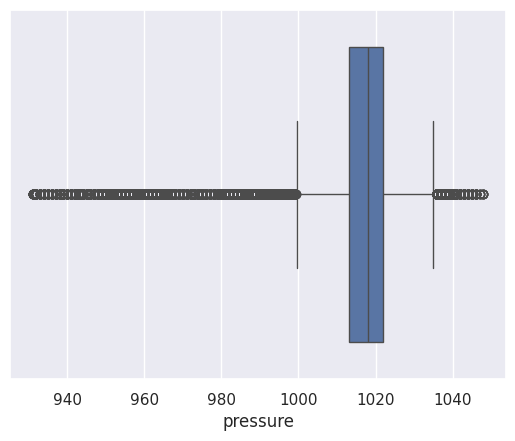

In [153]:
sns.boxplot(x=weather['pressure'])
plt.show()

In [154]:
df_1, df_2, df_3, df_4, df_5 = [x for _, x in weather.groupby('city_name')]
dfs = [df_1, df_2, df_3, df_4, df_5]

In [155]:
final = energy

for df in dfs:
    city = df['city_name'].unique()
    city_str = str(city).replace("'", "").replace('[', '').replace(']', '').replace(' ', '')
    df = df.add_suffix('_{}'.format(city_str))
    final = final.merge(df, on=['time'], how='outer')
    final = final.drop('city_name_{}'.format(city_str), axis=1)

final.head()

generation biomass  \
time                                            
2014-12-31 23:00:00+00:00               447.0   
2015-01-01 00:00:00+00:00               449.0   
2015-01-01 01:00:00+00:00               448.0   
2015-01-01 02:00:00+00:00               438.0   
2015-01-01 03:00:00+00:00               428.0   

                           generation fossil brown coal/lignite  \
time                                                              
2014-12-31 23:00:00+00:00                                 329.0   
2015-01-01 00:00:00+00:00                                 328.0   
2015-01-01 01:00:00+00:00                                 323.0   
2015-01-01 02:00:00+00:00                                 254.0   
2015-01-01 03:00:00+00:00                                 187.0   

                           generation fossil gas  generation fossil hard coal  \
time                                                                            
2014-12-31 23:00:00+00:00                 4844.0                       4821.0   
2015-01-01 00:00:00+00:00                 5196.0                       4755.0   
2015-01-01 01:00:00+00:00                 4857.0                       4581.0   
2015-01-01 02:00:00+00:00                 4314.0                       4131.0   
2015-01-01 03:00:00+00:00                 4130.0                       3840.0   

                           generation fossil oil  \
time                                               
2014-12-31 23:00:00+00:00                  162.0   
2015-01-01 00:00:00+00:00                  158.0   
2015-01-01 01:00:00+00:00                  157.0   
2015-01-01 02:00:00+00:00                  160.0   
2015-01-01 03:00:00+00:00                  156.0   

                           generation hydro pumped storage consumption  \
time                                                                     
2014-12-31 23:00:00+00:00                                        863.0   
2015-01-01 00:00:00+00:00                                        920.0   
2015-01-01 01:00:00+00:00                                       1164.0   
2015-01-01 02:00:00+00:00                                       1503.0   
2015-01-01 03:00:00+00:00                                       1826.0   

                           generation hydro run-of-river and poundage  \
time                                                                    
2014-12-31 23:00:00+00:00                                      1051.0   
2015-01-01 00:00:00+00:00                                      1009.0   
2015-01-01 01:00:00+00:00                                       973.0   
2015-01-01 02:00:00+00:00                                       949.0   
2015-01-01 03:00:00+00:00                                       953.0   

                           generation hydro water reservoir  \
time                                                          
2014-12-31 23:00:00+00:00                            1899.0   
2015-01-01 00:00:00+00:00                            1658.0   
2015-01-01 01:00:00+00:00                            1371.0   
2015-01-01 02:00:00+00:00                             779.0   
2015-01-01 03:00:00+00:00                             720.0   

                           generation nuclear  generation other  ...  \
time                                                             ...   
2014-12-31 23:00:00+00:00              7096.0              43.0  ...   
2015-01-01 00:00:00+00:00              7096.0              43.0  ...   
2015-01-01 01:00:00+00:00              7099.0              43.0  ...   
2015-01-01 02:00:00+00:00              7098.0              43.0  ...   
2015-01-01 03:00:00+00:00              7097.0              43.0  ...   

                           temp_min_Valencia  temp_max_Valencia  \
time                                                              
2014-12-31 23:00:00+00:00            270.475            270.475   
2015-01-01 00:00:00+00:00            270.475            270.475   
2015-01-01 01:00:00+00:00         

In [156]:
final.describe()

generation biomass  generation fossil brown coal/lignite  \
count        35064.000000                          35064.000000   
mean           383.531513                            448.096772   
std             85.346794                            354.621437   
min              0.000000                             -5.192503   
25%            333.000000                              0.000000   
50%            367.000000                            509.000000   
75%            433.000000                            757.000000   
max            592.000000                            999.000000   

       generation fossil gas  generation fossil hard coal  \
count           35064.000000                 35064.000000   
mean             5622.743928                  4256.468678   
std              2201.575972                  1962.078304   
min                 0.000000                     0.000000   
25%              4126.000000                  2527.000000   
50%              4969.500000                  4475.000000   
75%              6429.000000                  5839.000000   
max             20034.000000                  8359.000000   

       generation fossil oil  generation hydro pumped storage consumption  \
count           35064.000000                                 35064.000000   
mean              298.343342                                   475.633862   
std                52.520703                                   792.383359   
min                 0.000000                                   -65.790284   
25%               263.000000                                     0.000000   
50%               300.000000                                    68.000000   
75%               330.000000                                   616.000000   
max               449.000000                                  4523.000000   

       generation hydro run-of-river and poundage  \
count                                35064.000000   
mean                                   972.201996   
std                                    400.710597   
min                                      0.000000   
25%                                    637.000000   
50%                                    906.000000   
75%                                   1250.000000   
max                                   2000.000000   

       generation hydro water reservoir  generation nuclear  generation other  \
count                      35064.000000        35064.000000      35064.000000   
mean                        2605.670025         6263.453834         60.226294   
std                         1835.302360          840.358578         20.238892   
min                            0.000000            0.000000          0.000000   
25%                         1078.000000         5759.000000         53.000000   
50%                         2165.000000         6564.000000         57.000000   
75%                         3758.000000         7025.000000         80.000000   
max                         9728.000000         7117.000000        106.000000   

       ...  temp_min_Valencia  temp_max_Valencia  pressure_Valencia  \
count  ...       35064.000000       35064.000000       35064.000000   
mean   ...         290.225644         291.357900        1015.268124   
std    ...           7.090499           7.523438          10.044670   
min    ...         268.830656         268.830656         969.000000   
25%    ...         285.150000         285.650000        1012.000000   
50%    ...         290.150000         291.150000        1017.000000   
75%    ...         295.370000         297.150000        1021.000000   
max    ...         311.150000         314.820000        1042.000000   

       humidity_Valencia  wind_speed_Valencia  wind_deg_Valencia  \
count       35064.000000         35064.000000       35064.000000   
mean           65.093971             2.687300         160.801648   
std            19.678281             2.459133         120.412607   
min             8.000000             0.

As we can see, between the rain 1h and rain 3h, they have the same mean. But technically, they should be getting different values(rain3h) should be higher because the data is for 3 hours. SO, we will see the outlier column.

In [157]:
def plot_series(df=None, column=None, series=pd.Series([]),
                label=None, ylabel=None, title=None, start=0, end=None):
    """
    Plots a certain time-series which has either been loaded in a dataframe
    and which constitutes one of its columns or it a custom pandas series
    created by the user. The user can define either the 'df' and the 'column'
    or the 'series' and additionally, can also define the 'label', the
    'ylabel', the 'title', the 'start' and the 'end' of the plot.
    """
    sns.set()
    fig, ax = plt.subplots(figsize=(30, 12))
    ax.set_xlabel('Time', fontsize=16)
    if column:
        ax.plot(df[column][start:end], label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if series.any():
        ax.plot(series, label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if label:
        ax.legend(fontsize=16)
    if title:
        ax.set_title(title, fontsize=24)
    ax.grid(True)
    return ax

In [158]:
import matplotlib
import matplotlib.pyplot as plt

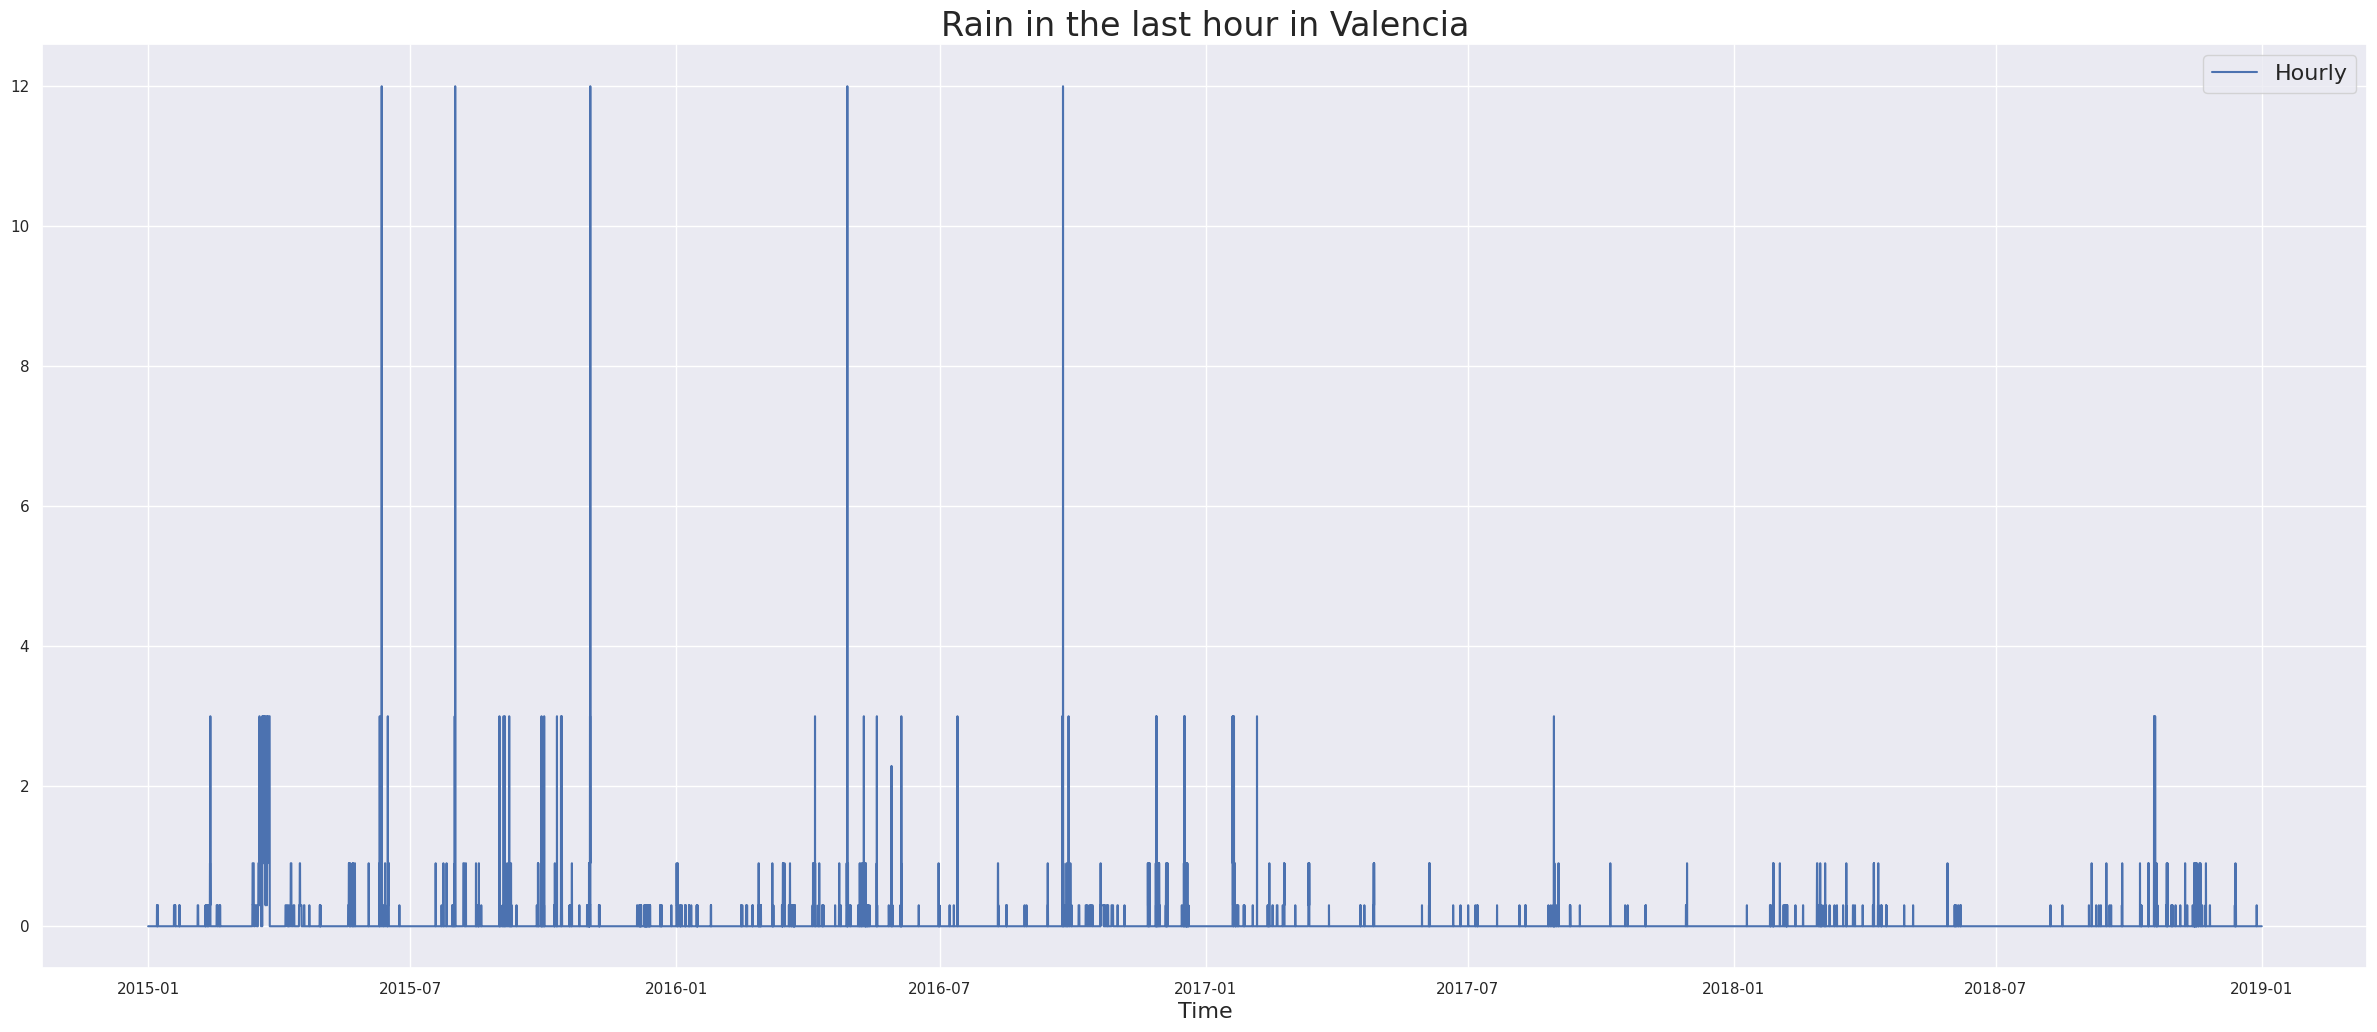

In [159]:
ax = plot_series(final, 'rain_1h_Valencia', label='Hourly',title='Rain in the last hour in Valencia')
plt.show()

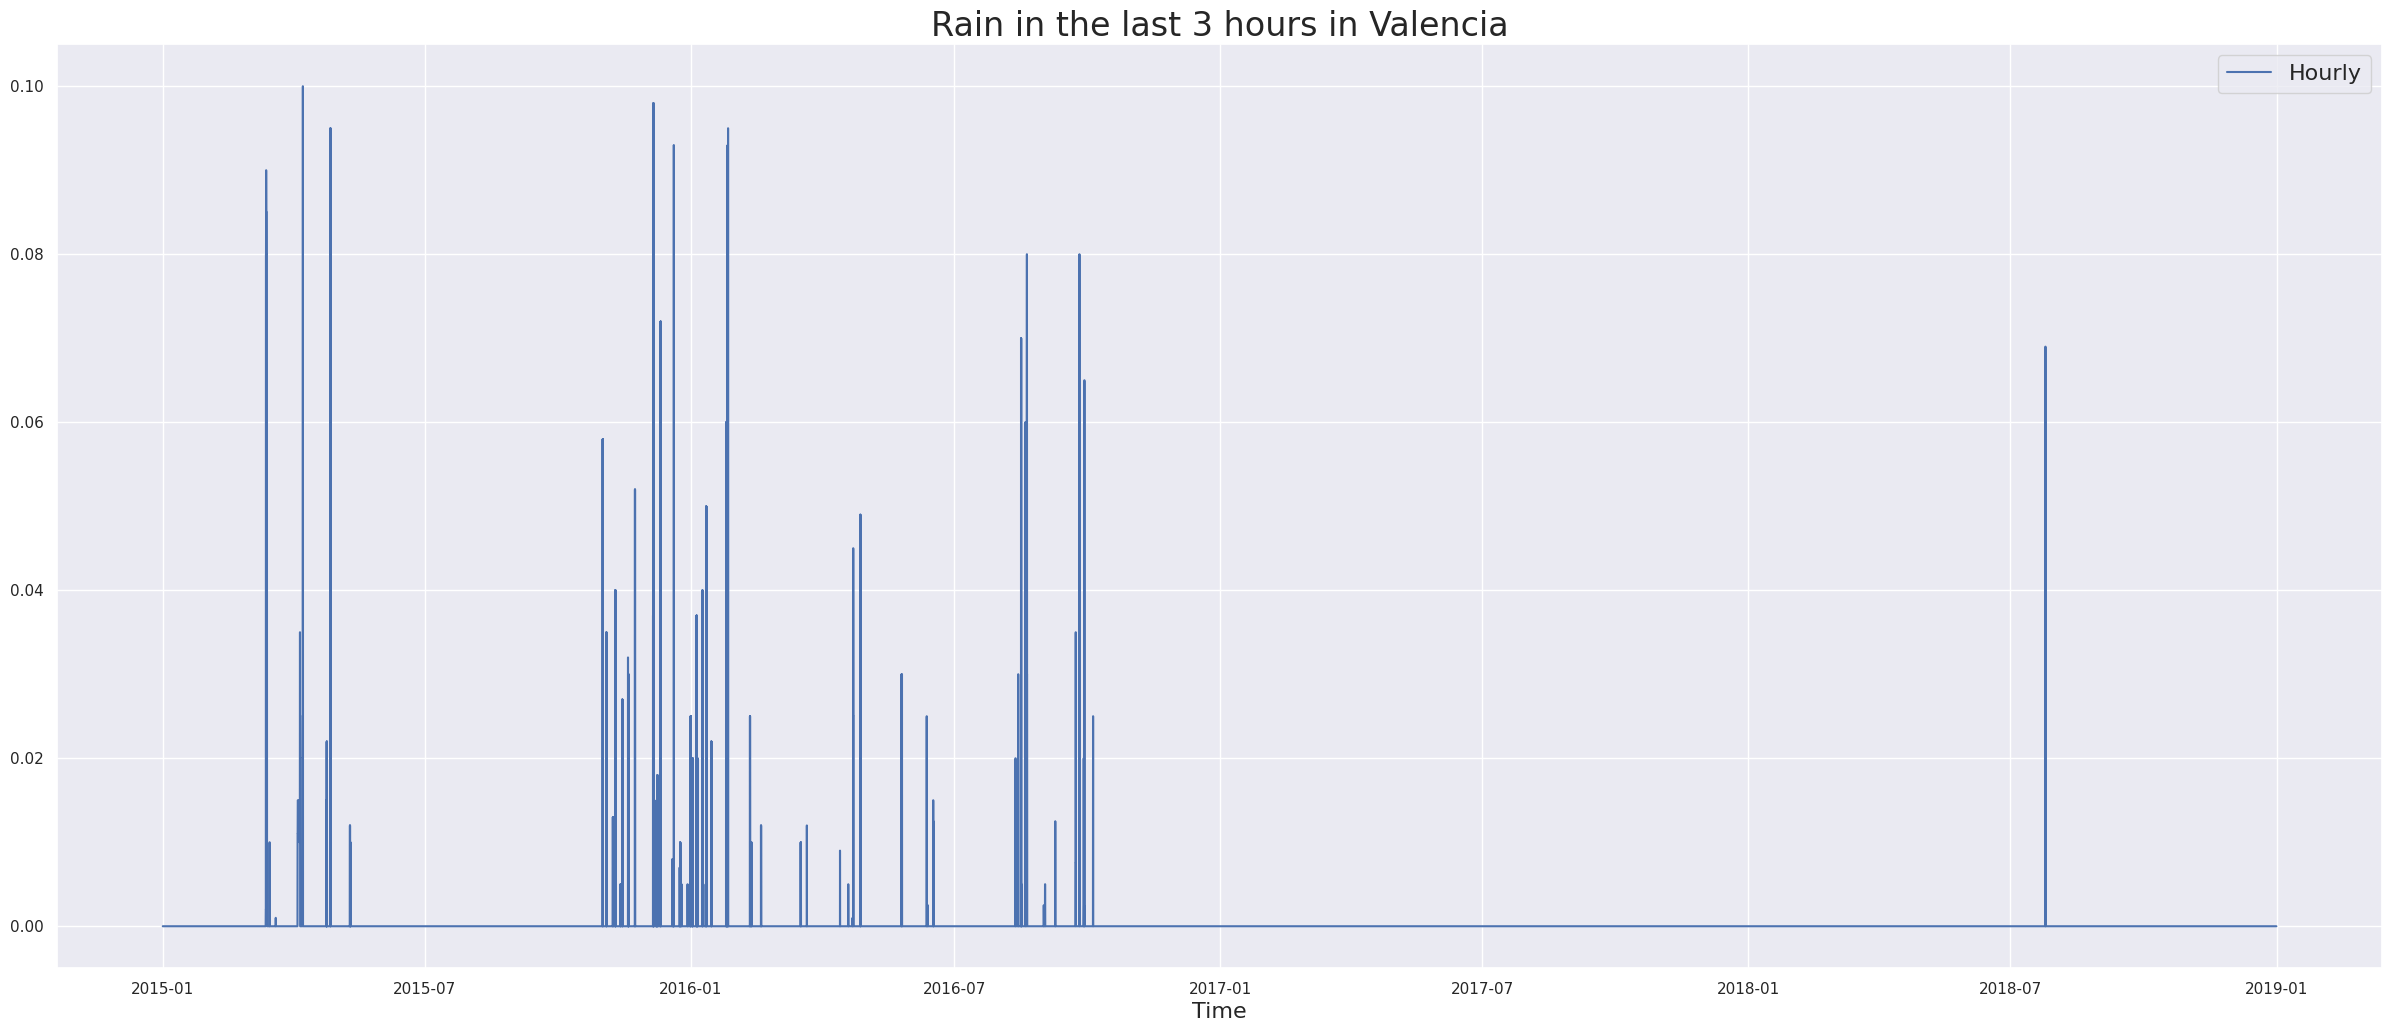

In [160]:
ax2 = plot_series(final,'rain_3h_Valencia',label='Hourly',title='Rain in the last 3 hours in Valencia')
plt.show()

In [161]:
cities = ['Barcelona', 'Bilbao', 'Madrid', 'Seville', 'Valencia']

for city in cities:
    final = final.drop(['rain_3h_{}'.format(city)], axis=1)

In [162]:
from pandas import Series, DataFrame

<ipython-input-163-7deeb320d5b6>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_price = final['price actual'].asfreq('M')
<ipython-input-163-7deeb320d5b6>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  shifted = final['price actual'].asfreq('M').shift(12)


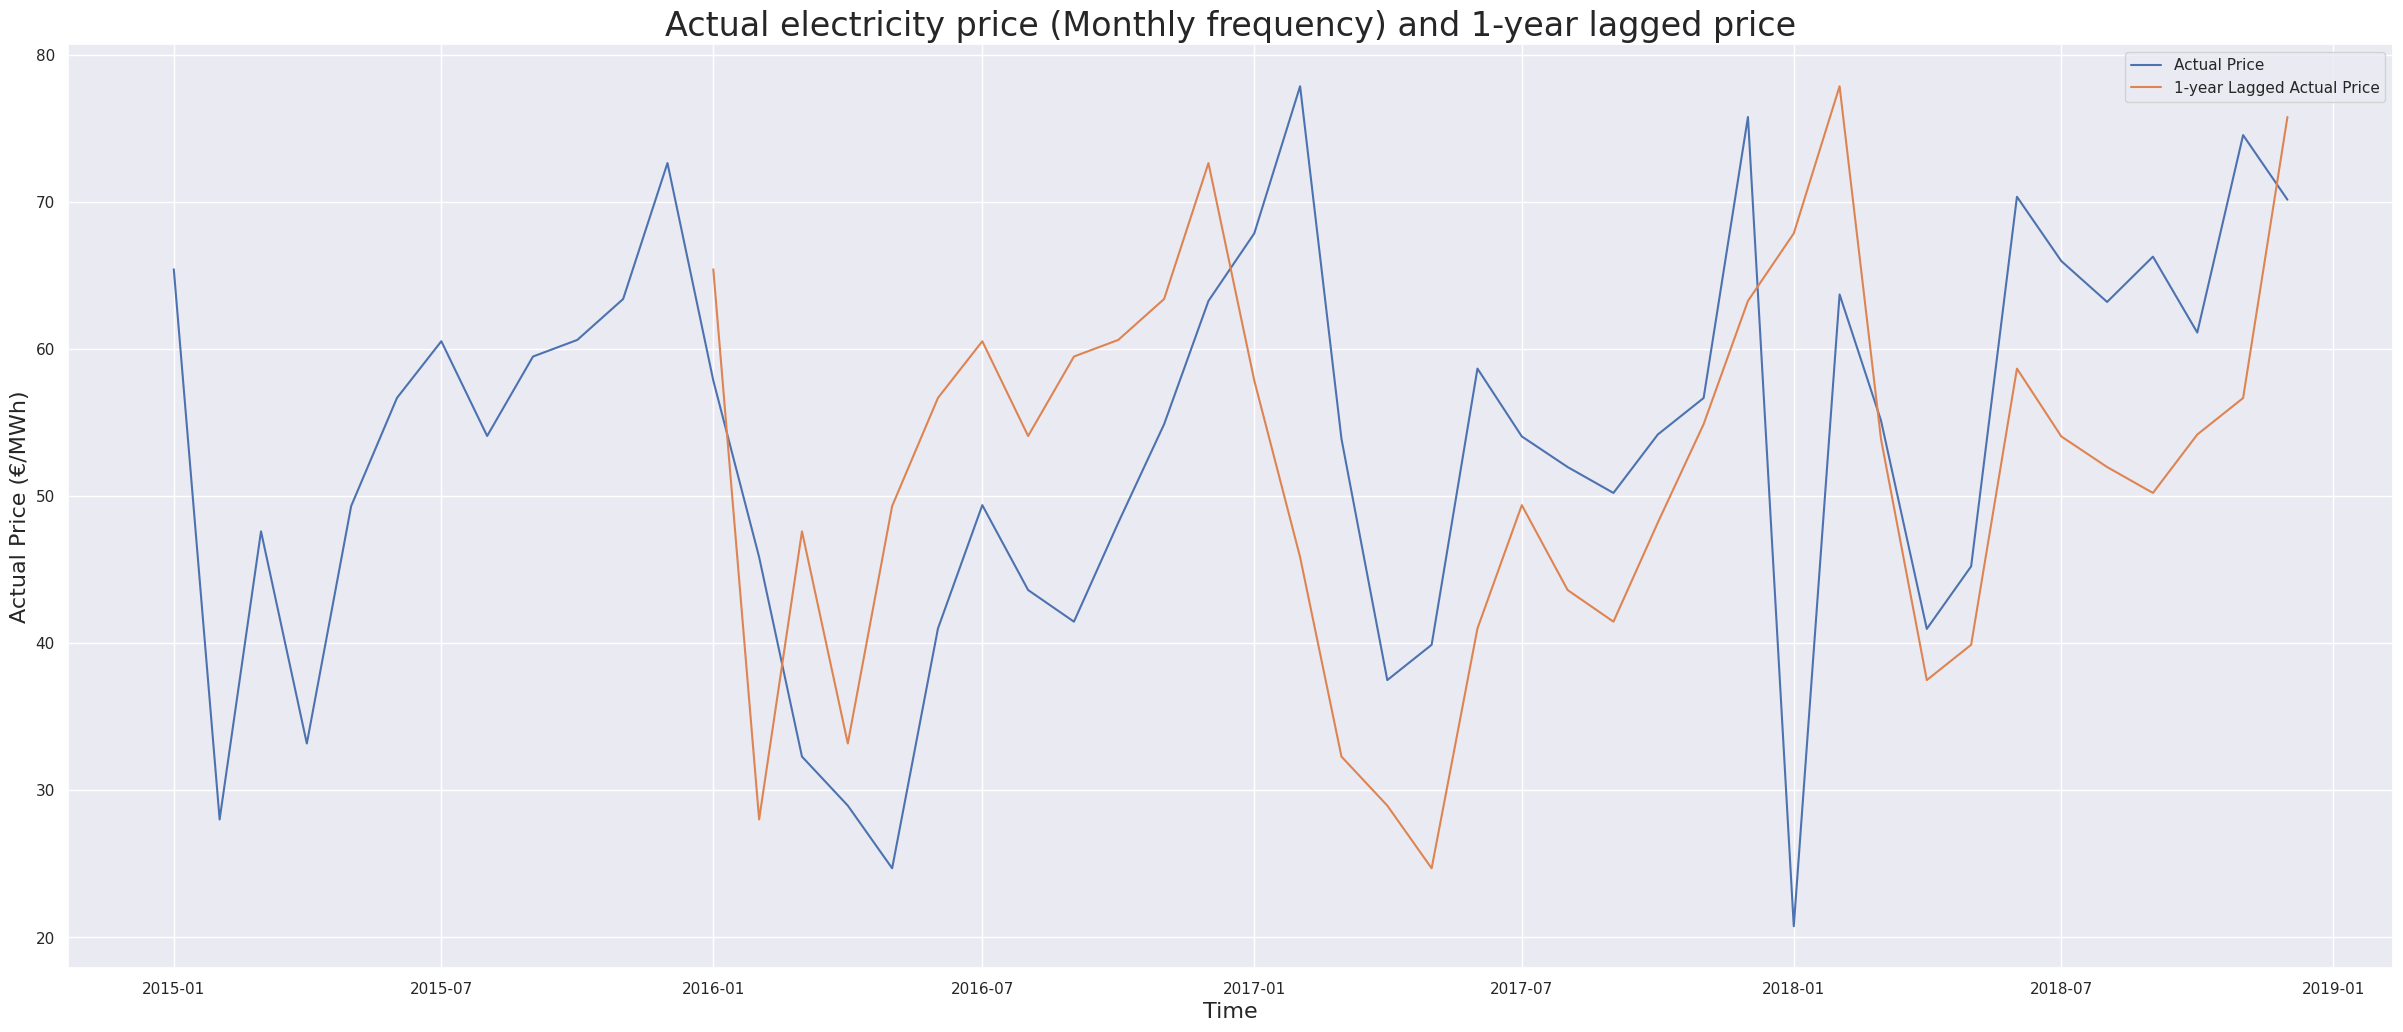

In [163]:
monthly_price = final['price actual'].asfreq('M')
ax = plot_series(series=monthly_price, ylabel='Actual Price (€/MWh)',
                 title='Actual electricity price (Monthly frequency) and 1-year lagged price')
shifted = final['price actual'].asfreq('M').shift(12)
ax.plot(shifted, label='Hourly')
ax.legend(['Actual Price', '1-year Lagged Actual Price'])
plt.show()

Now, we will see correlations in the data with the electricity charge

In [164]:
correlations = final.corr(method='pearson')
print(correlations['price actual'].sort_values(ascending=False).to_string())

price actual                                   1.000000
price day ahead                                0.732155
generation fossil hard coal                    0.465577
generation fossil gas                          0.461481
total load forecast                            0.435864
total load actual                              0.435276
generation fossil brown coal/lignite           0.364006
generation fossil oil                          0.285065
generation other renewable                     0.255525
pressure_Barcelona                             0.249177
pressure_Bilbao                                0.194063
generation waste                               0.168783
generation biomass                             0.142670
temp_min_Valencia                              0.133141
pressure_Valencia                              0.109812
temp_min_Barcelona                             0.103726
forecast solar day ahead                       0.101402
generation other                               0

In [165]:
final = final.drop(['snow_3h_Barcelona', 'snow_3h_Seville'], axis=1)

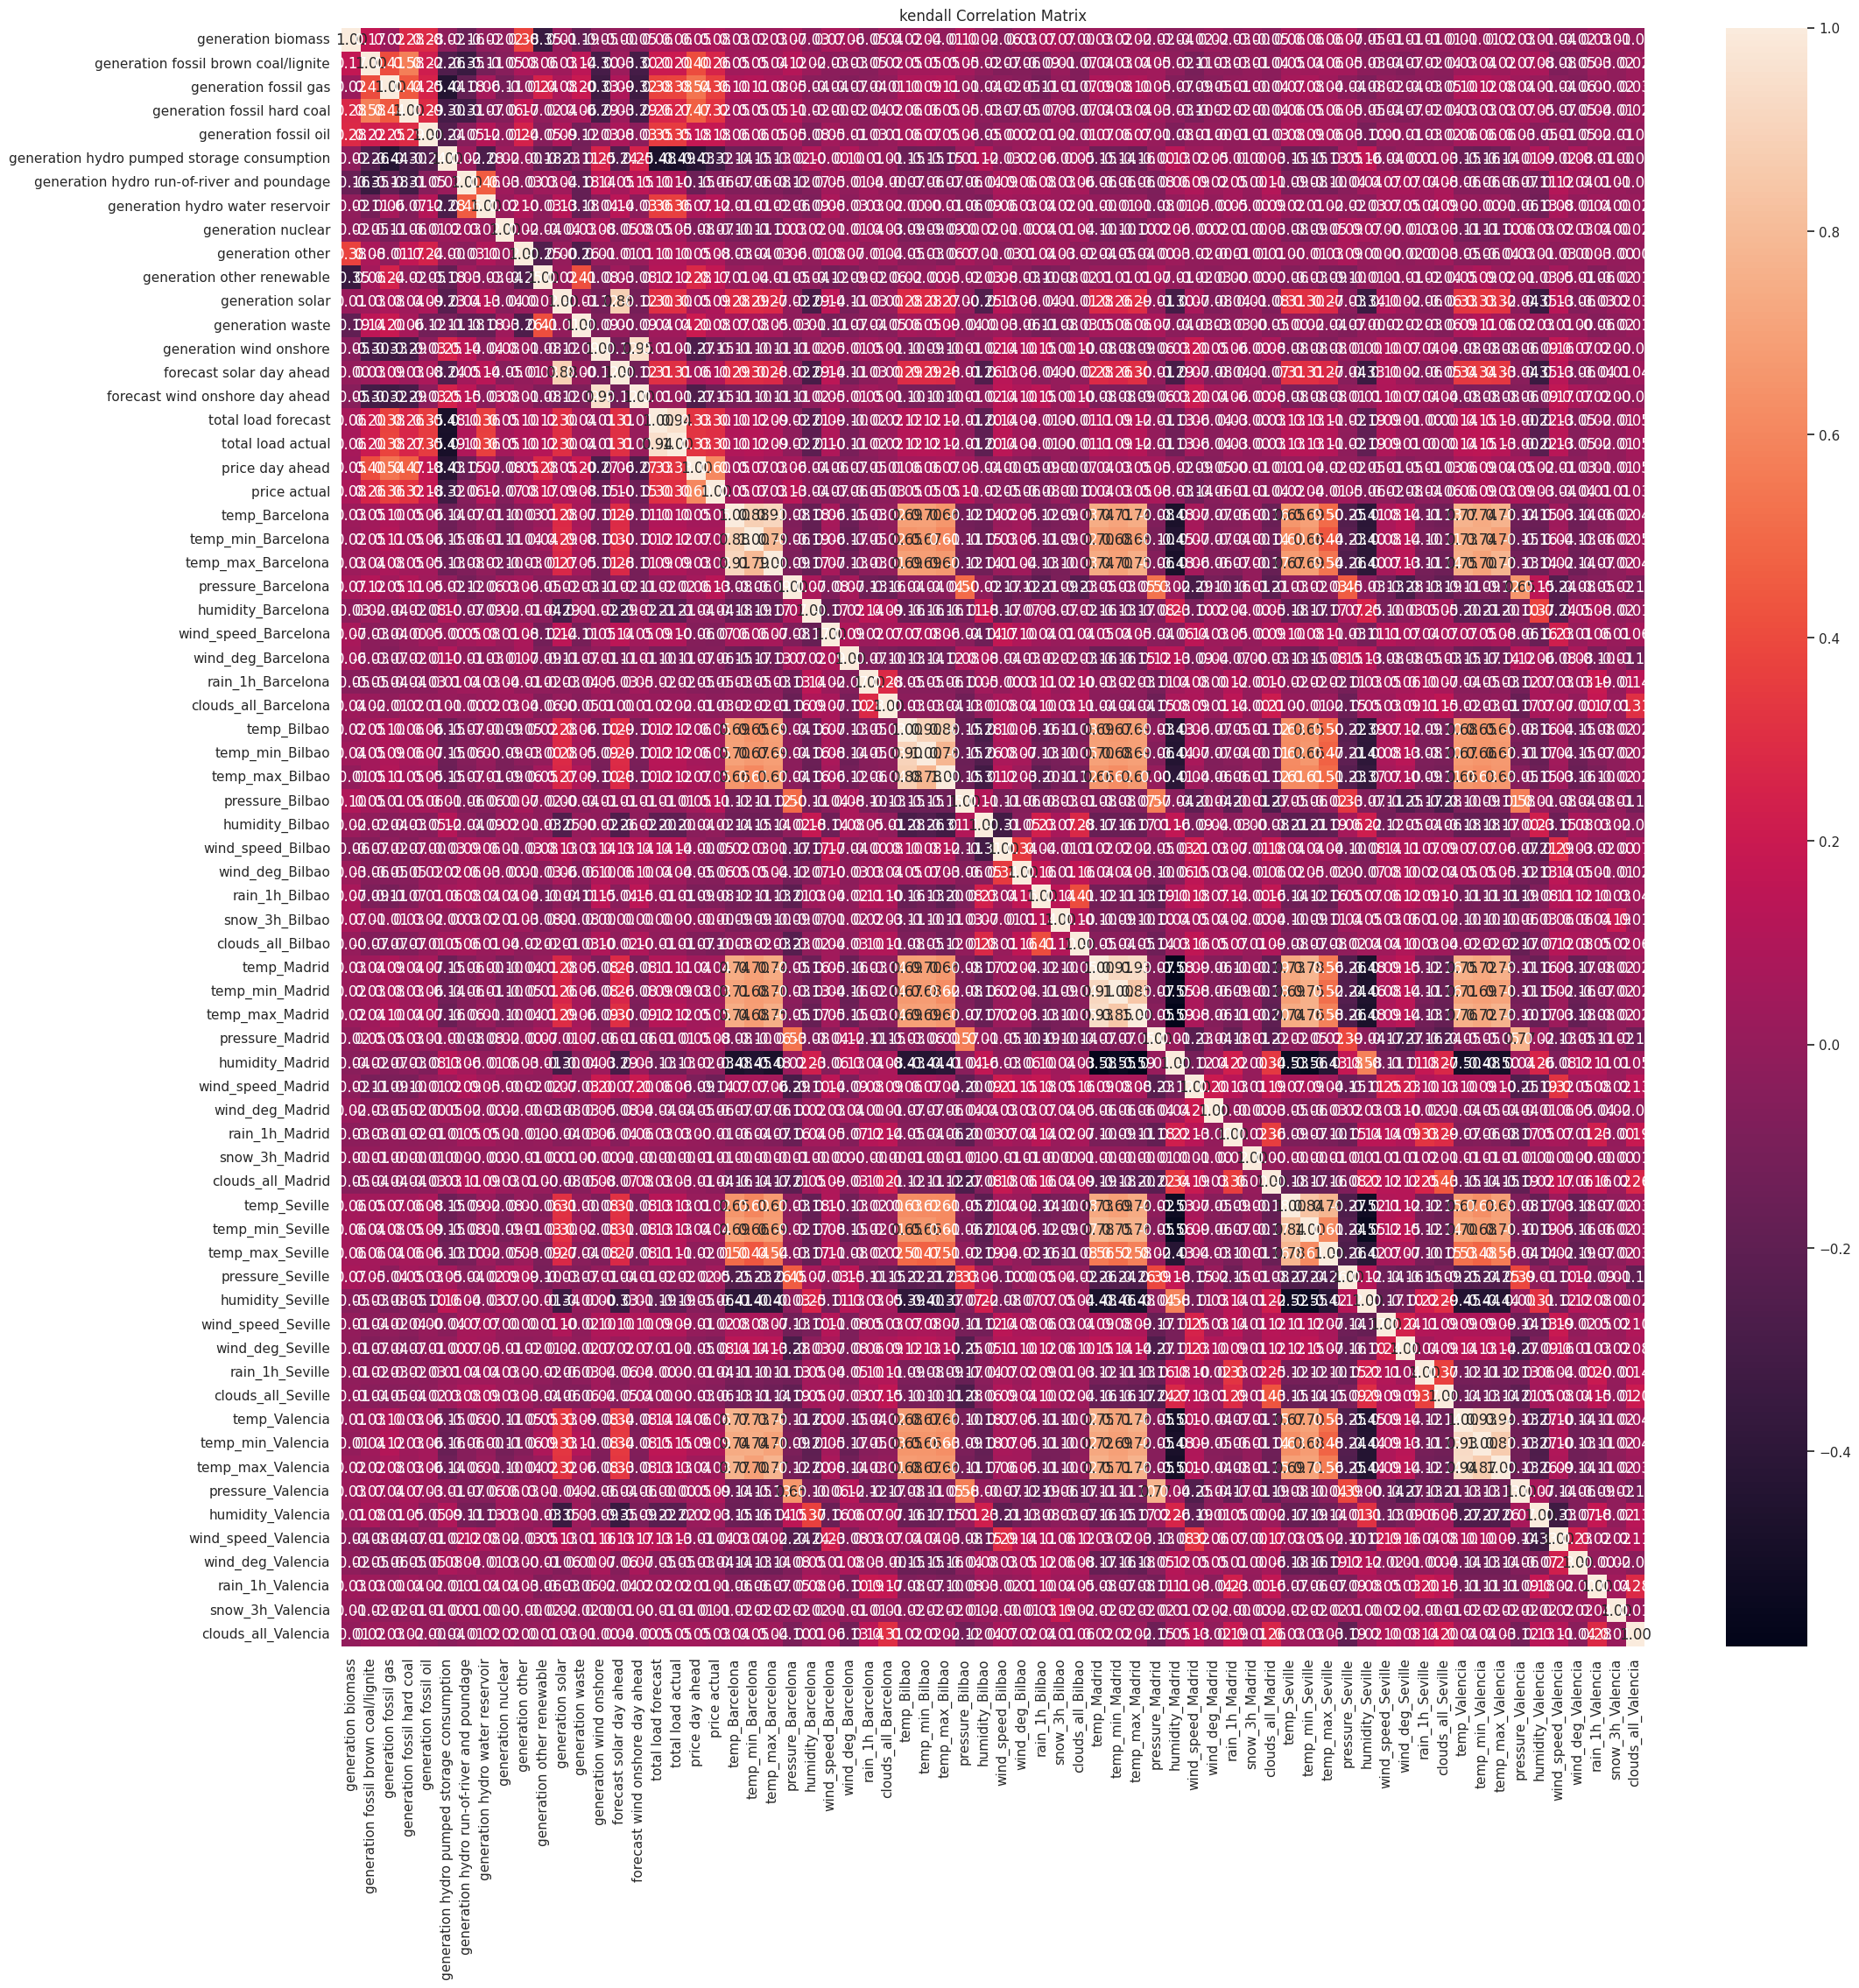

In [166]:
correlations = final.corr(method='kendall')
fig = plt.figure(figsize=(24, 24))
sns.heatmap(correlations, annot=True, fmt='.2f')
plt.title('kendall Correlation Matrix')
plt.show()

In [167]:
highly_correlated = abs(correlations[correlations > 0.8])
print(highly_correlated[highly_correlated < 1.0].stack().to_string())

generation solar                 forecast solar day ahead           0.884504
generation wind onshore          forecast wind onshore day ahead    0.947302
forecast solar day ahead         generation solar                   0.884504
forecast wind onshore day ahead  generation wind onshore            0.947302
total load forecast              total load actual                  0.944940
total load actual                total load forecast                0.944940
temp_Barcelona                   temp_min_Barcelona                 0.884507
                                 temp_max_Barcelona                 0.909474
temp_min_Barcelona               temp_Barcelona                     0.884507
temp_max_Barcelona               temp_Barcelona                     0.909474
temp_Bilbao                      temp_min_Bilbao                    0.897968
                                 temp_max_Bilbao                    0.880483
temp_min_Bilbao                  temp_Bilbao                        0.897968

We can see from above the variables which are all in high correlation with each variable. I just took a refernce for correlation factor >0.8.

Now, we successfully have the processed dataset. Now to implment any forecasting methods, we need to reduce the dimensionality of the data.
We do this because the data is so much dense and have a number of variables in it. Upon seeing the high correlance relations, we can see the min and max data is also higly correlating with each city.
We will try to now get a standardised value for all the data now. We can do this by getting a weighted dataset from the available values.

Before that, we will also utlise the time data which we used as index and categorize the variables broadly. We will assign the data into business hours and weekend hours. In the given cities, upon reading, it is found out that there is a rule to work only in a certain hours. A full-fledged lunch recess is given in the middle and this makes the day into two working shifts. So, we will split the business hours into two shifts accordingly.

In [168]:
for i in range(len(final)):
    position = final.index[i]
    hour = position.hour
    if ((hour > 8 and hour < 14) or (hour > 16 and hour < 21)):
        final.loc[position, 'business hour'] = 2
    elif (hour >= 14 and hour <= 16):
        final.loc[position, 'business hour'] = 1
    else:
        final.loc[position, 'business hour'] = 0

the above code assigns the values 0,1,2 to the time accordingly. But since weekends areholidays, we need to create another function which assigns the respective weekend day.

In [169]:
for i in range(len(final)):
    position = final.index[i]
    weekday = position.weekday()
    if (weekday == 6):
        final.loc[position, 'weekday'] = 2
    elif (weekday == 5):
        final.loc[position, 'weekday'] = 1
    else:
        final.loc[position, 'weekday'] = 0

Now, we assigned the weekends and businesshours. Now we will do the standarization of the data.

In [170]:
cities = ['Barcelona', 'Bilbao', 'Madrid', 'Seville', 'Valencia']

for i in range(len(final)):
    position = final.index[i]
    for city in cities:
        temp_max = final.loc[position, 'temp_max_{}'.format(city)]
        temp_min = final.loc[position, 'temp_min_{}'.format(city)]
        final.loc[position, 'temp_range_{}'.format(city)] = abs(temp_max - temp_min)

Now, we will take the weighted temperature ranges based on the population of the cities. We take this because the electricity usage is based on the numbe rof people using the electricity.

The populations of the cities as reported on Wikipedia taken fro the year the dataset is created.

Madrid: 6155116
Barcelona: 5179243
Valencia: 1645342
Seville: 1305342
Bilbao: 987000

In [171]:
total_pop = 15272043
weight_Madrid = 6155116 / total_pop
weight_Barcelona = 5179243 / total_pop
weight_Valencia = 1645342 / total_pop
weight_Seville = 1305342 / total_pop
weight_Bilbao = 987000 / total_pop

In [172]:
cities_weights = {'Madrid': weight_Madrid,
                  'Barcelona': weight_Barcelona,
                  'Valencia': weight_Valencia,
                  'Seville': weight_Seville,
                  'Bilbao': weight_Bilbao}

In [173]:
for i in range(len(final)):
    position = final.index[i]
    temp_weighted = 0
    for city in cities:
        temp = final.loc[position, 'temp_{}'.format(city)]
        temp_weighted += temp * cities_weights.get('{}'.format(city))
    final.loc[position, 'temp_weighted'] = temp_weighted

In [174]:
final['generation coal all'] = final['generation fossil hard coal'] + final['generation fossil brown coal/lignite']

Now, we try to do eda and get the variance of the data and see the curve. We will define the function. This is not a univariate dataset because there are a lot of variables in the data.

In [175]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i + target_size])
        else:
            labels.append(target[i : i + target_size])

    return np.array(data), np.array(labels)

In [176]:
train_end_idx = 27048
cv_end_idx = 31056
test_end_idx = 35064

In [177]:
X = final[final.columns.drop('total load actual')].values
y = final['total load actual'].values

y = y.reshape(-1, 1)

In [178]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [179]:
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

In [180]:
scaler_X.fit(X[:train_end_idx])
scaler_y.fit(y[:train_end_idx])

MinMaxScaler()

In [181]:
X_norm = scaler_X.transform(X)
y_norm = scaler_y.transform(y)

In [182]:
pca = PCA()
X_pca = pca.fit(X_norm[:train_end_idx])

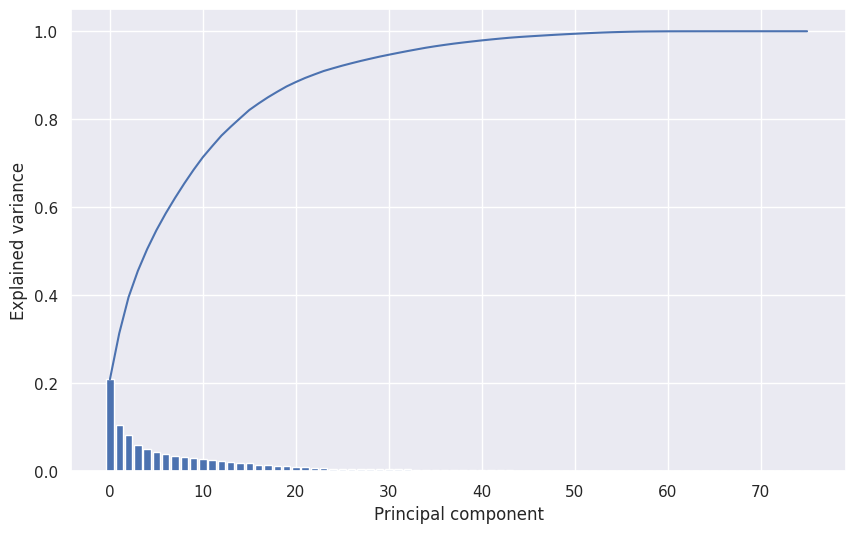

In [183]:
num_components = len(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.bar(np.arange(num_components), pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal component')
plt.ylabel('Explained variance')
plt.show()

In [184]:
pca = PCA(n_components=0.80)
pca.fit(X_norm[:train_end_idx])
X_pca = pca.transform(X_norm)

In [185]:
X_pca.shape

(35064, 15)

In [186]:
dataset_norm = np.concatenate((X_pca, y_norm), axis=1)

past_history = 24
future_target = 0

In [187]:
X_train, y_train = multivariate_data(dataset_norm, dataset_norm[:, -1],
                                     0, train_end_idx, past_history,
                                     future_target, step=1, single_step=True)

In [188]:
X_val, y_val = multivariate_data(dataset_norm, dataset_norm[:, -1],
                                 train_end_idx, cv_end_idx, past_history,
                                 future_target, step=1, single_step=True)

In [189]:
X_test, y_test = multivariate_data(dataset_norm, dataset_norm[:, -1],
                                   cv_end_idx, test_end_idx, past_history,
                                   future_target, step=1, single_step=True)

In [190]:
batch_size = 32
buffer_size = 1000

In [191]:
import tensorflow as tf

In [192]:
train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train = train.cache().shuffle(buffer_size).batch(batch_size).prefetch(1)

validation = tf.data.Dataset.from_tensor_slices((X_val, y_val))
validation = validation.batch(batch_size).prefetch(1)

In [193]:
input_shape = X_train.shape[-2:]
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
              lambda epoch: 1e-4 * 10**(epoch / 10))
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10)

In [194]:
y_test = y_test.reshape(-1, 1)
y_test_inv = scaler_y.inverse_transform(y_test)

In [195]:
def plot_model_rmse_and_loss(history):
    # Evaluate train and validation accuracies and losses
    train_rmse = history.history['root_mean_squared_error']
    val_rmse = history.history['val_root_mean_squared_error']

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Visualize epochs vs. train and validation accuracies and losses
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.plot(train_rmse, label='Training RMSE')
    plt.plot(val_rmse, label='Validation RMSE')
    plt.legend()
    plt.title('Epochs vs. Training and Validation RMSE')

    plt.subplot(1, 2, 2)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Epochs vs. Training and Validation Loss')

    plt.show()

In [196]:
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, TimeDistributed, Flatten, Dropout, RepeatVector

In [197]:
tf.keras.backend.clear_session()

multivariate_lstm = tf.keras.models.Sequential([
    LSTM(100, input_shape=input_shape, return_sequences=True),
    Flatten(),
    Dense(200, activation='relu'),
    Dropout(0.1),
    Dense(1)
])

model_checkpoint = tf.keras.callbacks.ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=6e-3, amsgrad=True)

multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [198]:
history = multivariate_lstm.fit(train, epochs=10,
                                validation_data=validation,
                                callbacks=[early_stopping,
                                           model_checkpoint])

Epoch 1/10
845/845 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - loss: 0.6661 - root_mean_squared_error: 0.6335 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0739
Epoch 2/10
845/845 ━━━━━━━━━━━━━━━━━━━━ 39s 27ms/step - loss: 0.0070 - root_mean_squared_error: 0.0834 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0579
Epoch 3/10
845/845 ━━━━━━━━━━━━━━━━━━━━ 42s 29ms/step - loss: 0.0050 - root_mean_squared_error: 0.0708 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0526
Epoch 4/10
845/845 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - loss: 0.0039 - root_mean_squared_error: 0.0625 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0502
Epoch 5/10
845/845 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - loss: 0.0034 - root_mean_squared_error: 0.0580 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0454
Epoch 6/10
845/845 ━━━━━━━━━━━━━━━━━━━━ 42s 29ms/step - loss: 0.0029 - root_mean_squared_error: 0.0534 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0438
Epoch 7/10
845/845 ━━━━━━━━━━━━━━━━━━━━ 

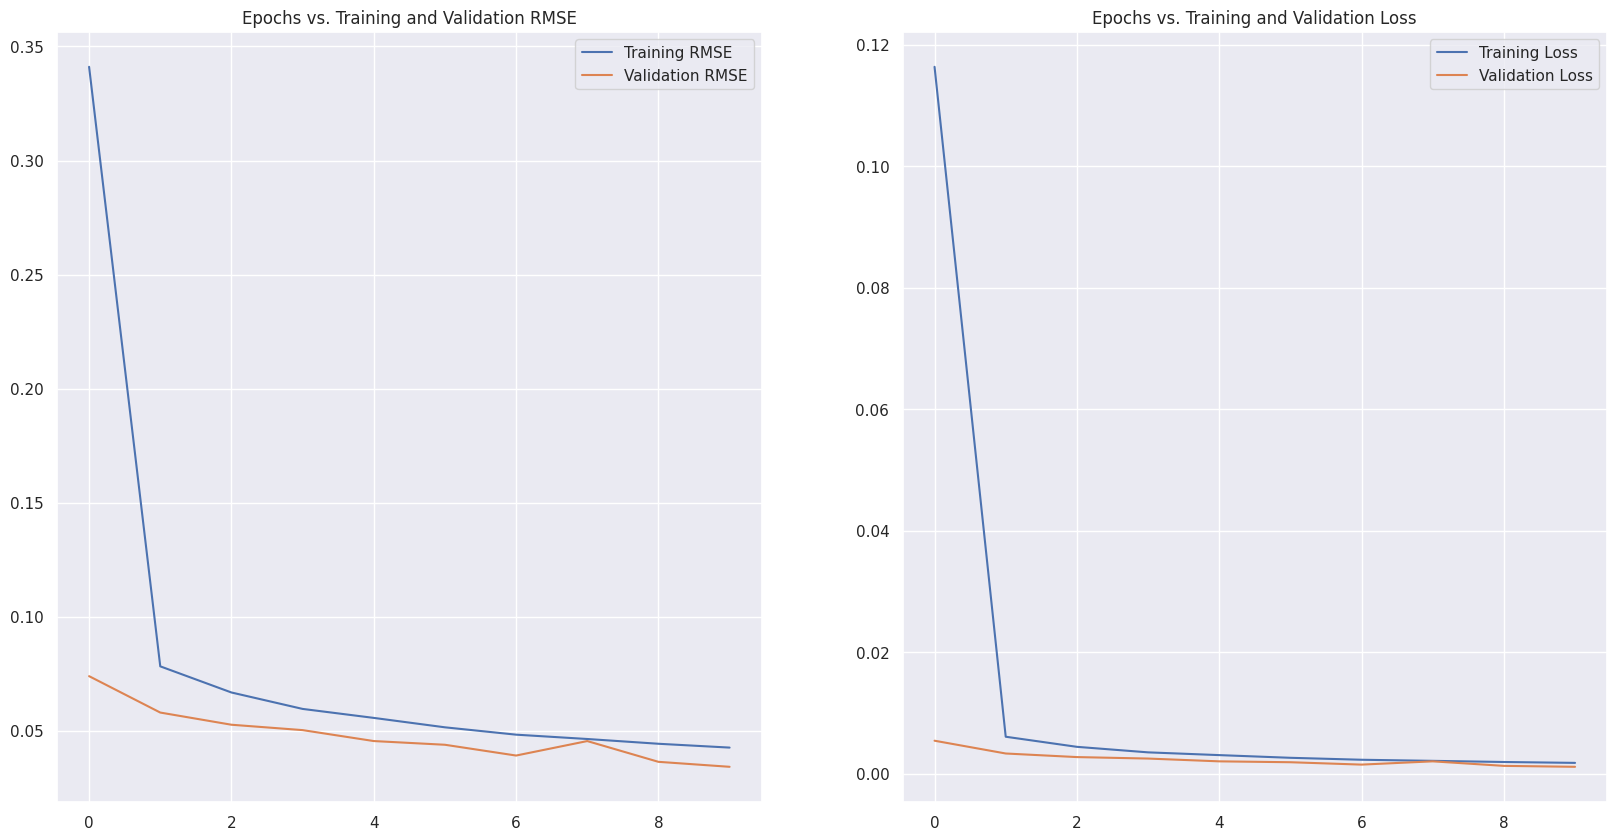

In [199]:
plot_model_rmse_and_loss(history)


In [200]:
from math import sqrt

In [202]:
# Make sure the file name and extension match the saved model
multivariate_lstm = tf.keras.models.load_model('multivariate_lstm.keras')

forecast = multivariate_lstm.predict(X_test)
lstm_forecast = scaler_y.inverse_transform(forecast)

rmse_lstm = sqrt(mean_squared_error(y_test_inv, lstm_forecast))
print('RMSE of hour-ahead electricity price LSTM forecast: {}'.format(round(rmse_lstm, 3)))


125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step
RMSE of hour-ahead electricity price LSTM forecast: 738.781


In [204]:
tf.keras.backend.clear_session()

multivariate_stacked_lstm = tf.keras.models.Sequential([
    LSTM(250, input_shape=input_shape, return_sequences=True),
    LSTM(150, return_sequences=True),
    Flatten(),
    Dense(150, activation='relu'),
    Dropout(0.1),
    Dense(1)
])

# Change the file extension to .keras
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
                   'multivariate_stacked_lstm.keras', save_best_only=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=3e-3, amsgrad=True)

multivariate_stacked_lstm.compile(loss=loss,
                                  optimizer=optimizer,
                                  metrics=metric)


In [209]:
import os

# List all files in the current directory
print(os.listdir())


['.config', 'multivariate_lstm.keras', 'weather_features.csv', 'energy_dataset.csv', 'sample_data']


In [210]:
# Ensure this is after you define and train your model
multivariate_stacked_lstm.save('multivariate_stacked_lstm.keras')  # Save in .keras format
# Or, you can save in .h5 format if you prefer:
multivariate_stacked_lstm.save('multivariate_stacked_lstm.h5')


In [211]:
# If saved as .keras
multivariate_stacked_lstm = tf.keras.models.load_model('multivariate_stacked_lstm.keras')
# If saved as .h5
# multivariate_stacked_lstm = tf.keras.models.load_model('multivariate_stacked_lstm.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 32 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [212]:
multivariate_stacked_lstm = tf.keras.models.load_model('multivariate_stacked_lstm.keras')

forecast = multivariate_stacked_lstm.predict(X_test)
multivariate_stacked_lstm_forecast = scaler_y.inverse_transform(forecast)

rmse_mult_stacked_lstm = sqrt(mean_squared_error(y_test_inv,
                                                 multivariate_stacked_lstm_forecast))
print('RMSE of hour-ahead electricity usage multivariate Stacked LSTM forecast: {}'
      .format(round(rmse_mult_stacked_lstm, 3)))


125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step
RMSE of hour-ahead electricity usage multivariate Stacked LSTM forecast: 12925.993


In [215]:
# Define the optimizer with the correct parameter name
optimizer = tf.keras.optimizers.Adam(learning_rate=6e-3, amsgrad=True)


In [216]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Input

# Clear any existing sessions
tf.keras.backend.clear_session()

# Define the model architecture
multivariate_cnn = tf.keras.models.Sequential([
    Input(shape=input_shape),  # Add Input layer
    Conv1D(filters=48, kernel_size=2,
           strides=1, padding='causal',
           activation='relu'),
    Flatten(),
    Dense(48, activation='relu'),
    Dense(1)
])

# Define the model checkpoint with the correct file extension
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
                   'multivariate_cnn.keras', save_best_only=True)

# Define the optimizer with the correct parameter name
optimizer = tf.keras.optimizers.Adam(learning_rate=6e-3, amsgrad=True)

# Compile the model
multivariate_cnn.compile(loss=loss,
                          optimizer=optimizer,
                          metrics=metric)


In [217]:
history = multivariate_cnn.fit(train, epochs=120,
                               validation_data=validation,
                               callbacks=[early_stopping,
                                          model_checkpoint])

Epoch 1/120
845/845 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1828 - root_mean_squared_error: 0.2902 - val_loss: 0.0390 - val_root_mean_squared_error: 0.1975
Epoch 2/120
845/845 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0412 - root_mean_squared_error: 0.2028 - val_loss: 0.0391 - val_root_mean_squared_error: 0.1978
Epoch 3/120
845/845 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0410 - root_mean_squared_error: 0.2025 - val_loss: 0.0390 - val_root_mean_squared_error: 0.1975
Epoch 4/120
845/845 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0410 - root_mean_squared_error: 0.2024 - val_loss: 0.0393 - val_root_mean_squared_error: 0.1983
Epoch 5/120
845/845 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0409 - root_mean_squared_error: 0.2021 - val_loss: 0.0392 - val_root_mean_squared_error: 0.1979
Epoch 6/120
845/845 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0409 - root_mean_squared_error: 0.2021 - val_loss: 0.0392 - val_root_mean_squared_error: 0.1980
Epoch 7/120
845/845 ━━━━━━━━━━━━━━━━━━━━ 3s 3m

In [218]:
X_train_xgb = X_train.reshape(-1, X_train.shape[1] * X_train.shape[2])
X_val_xgb = X_val.reshape(-1, X_val.shape[1] * X_val.shape[2])
X_test_xgb = X_test.reshape(-1, X_test.shape[1] * X_test.shape[2])

In [219]:
import xgboost as xgb


In [220]:
param = {'eta': 0.03, 'max_depth': 180,
         'subsample': 1.0, 'colsample_bytree': 0.95,
         'alpha': 0.1, 'lambda': 0.15, 'gamma': 0.1,
         'objective': 'reg:linear', 'eval_metric': 'rmse',
         'silent': 1, 'min_child_weight': 0.1, 'n_jobs': -1}

dtrain = xgb.DMatrix(X_train_xgb, y_train)
dval = xgb.DMatrix(X_val_xgb, y_val)
dtest = xgb.DMatrix(X_test_xgb, y_test)
eval_list = [(dtrain, 'train'), (dval, 'eval')]

xgb_model = xgb.train(param, dtrain, 180, eval_list, early_stopping_rounds=3)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:11:48] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:11:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:0.19309	eval-rmse:0.19222
[1]	train-rmse:0.18751	eval-rmse:0.18666
[2]	train-rmse:0.18208	eval-rmse:0.18127
[3]	train-rmse:0.17683	eval-rmse:0.17605
[4]	train-rmse:0.17174	eval-rmse:0.17099
[5]	train-rmse:0.16680	eval-rmse:0.16606
[6]	train-rmse:0.16202	eval-rmse:0.16131
[7]	train-rmse:0.15739	eval-rmse:0.15671
[8]	train-rmse:0.15289	eval-rmse:0.15222
[9]	train-rmse:0.14854	eval-rmse:0.14788
[10]	train-rmse:0.14433	eval-rmse:0.14368
[11]	train-rmse:0.14023	eval-rmse:0.13960
[12]	train-rmse:0.13627	eval-rmse:0.13565
[13]	train-rmse:0.13243	eval-rmse:0.13184
[14]	train-rmse:0.12872	eval-rmse:0.12815
[15]	train-rmse:0.12511	eval-rmse:0.12455
[16]	train-rmse:0.12161	eval-rmse:0.12108
[17]	train-rmse:0.11823	eval-rmse:0.11772
[18]	train-rmse:0.11495	eval-rmse:0.11446
[19]	train-rmse:0.11178	eval-rmse:0.11130
[20]	train-rmse:0.10870	eval-rmse:0.10825
[21]	train-rmse:0.10572	eval-rmse:0.10529
[22]	train-rmse:0.10284	eval-rmse:0.10244
[23]	train-rmse:0.10005	eval-rmse:0.09965
[2

In [221]:
forecast = xgb_model.predict(dtest)
xgb_forecast = forecast.reshape(-1, 1)

xgb_forecast_inv = scaler_y.inverse_transform(xgb_forecast)

rmse_xgb = sqrt(mean_squared_error(y_test_inv, xgb_forecast_inv))
print('RMSE of hour-ahead electricity usage load XGBoost forecast: {}'
      .format(round(rmse_xgb, 3)))

RMSE of hour-ahead electricity usage load XGBoost forecast: 588.699
